# Data Import & Manipulation
Here, we import the required modules and read (+organise) the dataset

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.stattools as ts


import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf

from math import sqrt
from numpy.random import seed
seed(1)
from pandas import DataFrame
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget https://www.dropbox.com/s/jpw4fyv6mh31ql4/NTP2015-2017fire.txt

--2022-01-12 05:16:12--  https://www.dropbox.com/s/jpw4fyv6mh31ql4/NTP2015-2017fire.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/jpw4fyv6mh31ql4/NTP2015-2017fire.txt [following]
--2022-01-12 05:16:13--  https://www.dropbox.com/s/raw/jpw4fyv6mh31ql4/NTP2015-2017fire.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc82446f8a2adf6fa7ea1dcf42c1.dl.dropboxusercontent.com/cd/0/inline/BdmRmJOws3rrBKzs2EP_Scgax_jPNU4DMG5HeFmz3b8BWzs97j172wLiiYm1zLSzs2fkMkSjZRTm-9v41lcf8h17unAbikvViWdgoi0HAJ-yFP4-QkabOmb4R7tKpfC8JEASrpvfOOu4V-UXssfJ7aoT/file# [following]
--2022-01-12 05:16:13--  https://uc82446f8a2adf6fa7ea1dcf42c1.dl.dropboxusercontent.com/cd/0/inline/BdmRmJOws3rrBKzs2EP_Scgax_jPNU4DMG5HeFmz3b8BWzs97j172wLiiYm1zLS

In [3]:
%cd /content/
#df = pd.read_csv('/content/gdrive/MyDrive/dlku/NTP2015fire-Jan.txt', sep='\t', header=None)
df = pd.read_csv('NTP2015-2017fire.txt', sep='\t', header=None)
df.columns = ["date", "station", "addr1", "addr2", "longitude", "latitude", "township"]

/content


In [4]:
df

,date,station,addr1,addr2,longitude,latitude,township
0,2015/1/1 0:13,火警-瓦斯漏氣,新北市板橋區重慶路245巷 擎天雙星,新北市板橋區重慶路245巷100號,121.466281,25.000569,板橋區廣德里
1,2015/1/1 0:16,火警-倉庫,新北市三重區富福街48號;5樓,新北市三重區富福街45號,121.491579,25.084172,三重區富華里
2,2015/1/1 0:48,火警-查看案件,新北市淡水區民權路139號;11樓,新北市淡水區民權路139號,121.460224,25.136422,淡水區民權里
3,2015/1/1 0:56,火警-查看案件,新北市新莊區 新月橋近新莊端,新北市新莊區,121.450333,25.031506,新莊區泰豐里
4,2015/1/1 1:04,火警-汽車,新北市樹林區八德街71巷,新北市樹林區八德街71巷10號,121.420005,24.982273,樹林區和平里
...,...,...,...,...,...,...,...
24085,2017/12/31 17:14,火警-集合住宅,新北市中和區圓通路305巷3弄7號 對面5樓,新北市中和區圓通路305巷5弄7號,121.493909,24.990417,中和區錦盛里
24086,2017/12/31 18:40,火警-集合住宅,新北市汐止區橫科路322巷24弄6號1樓,新北市汐止區橫科路322巷24弄6號之1,121.621682,25.048063,汐止區東勢里
24087,2017/12/31 20:09,火警-查看案件,新北市三重區溪尾街30號,新北市三重區溪尾街30號,121.490806,25.076529,三重區福隆里
24088,2017/12/31 20:44,火警-查看案件,新北市永和區民族街67巷27弄5號,新北市永和區民族街67巷27弄5號,121.519391,24.997367,永和區民族里


In [5]:
#set date time format
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')

In [6]:
df

,date,station,addr1,addr2,longitude,latitude,township
0,2015-01-01 00:13:00,火警-瓦斯漏氣,新北市板橋區重慶路245巷 擎天雙星,新北市板橋區重慶路245巷100號,121.466281,25.000569,板橋區廣德里
1,2015-01-01 00:16:00,火警-倉庫,新北市三重區富福街48號;5樓,新北市三重區富福街45號,121.491579,25.084172,三重區富華里
2,2015-01-01 00:48:00,火警-查看案件,新北市淡水區民權路139號;11樓,新北市淡水區民權路139號,121.460224,25.136422,淡水區民權里
3,2015-01-01 00:56:00,火警-查看案件,新北市新莊區 新月橋近新莊端,新北市新莊區,121.450333,25.031506,新莊區泰豐里
4,2015-01-01 01:04:00,火警-汽車,新北市樹林區八德街71巷,新北市樹林區八德街71巷10號,121.420005,24.982273,樹林區和平里
...,...,...,...,...,...,...,...
24085,2017-12-31 17:14:00,火警-集合住宅,新北市中和區圓通路305巷3弄7號 對面5樓,新北市中和區圓通路305巷5弄7號,121.493909,24.990417,中和區錦盛里
24086,2017-12-31 18:40:00,火警-集合住宅,新北市汐止區橫科路322巷24弄6號1樓,新北市汐止區橫科路322巷24弄6號之1,121.621682,25.048063,汐止區東勢里
24087,2017-12-31 20:09:00,火警-查看案件,新北市三重區溪尾街30號,新北市三重區溪尾街30號,121.490806,25.076529,三重區福隆里
24088,2017-12-31 20:44:00,火警-查看案件,新北市永和區民族街67巷27弄5號,新北市永和區民族街67巷27弄5號,121.519391,24.997367,永和區民族里


In [7]:
#extract only numerical/quantitative data
dften = df[["date", "longitude", "latitude"]]

In [8]:
dften

,date,longitude,latitude
0,2015-01-01 00:13:00,121.466281,25.000569
1,2015-01-01 00:16:00,121.491579,25.084172
2,2015-01-01 00:48:00,121.460224,25.136422
3,2015-01-01 00:56:00,121.450333,25.031506
4,2015-01-01 01:04:00,121.420005,24.982273
...,...,...,...
24085,2017-12-31 17:14:00,121.493909,24.990417
24086,2017-12-31 18:40:00,121.621682,25.048063
24087,2017-12-31 20:09:00,121.490806,25.076529
24088,2017-12-31 20:44:00,121.519391,24.997367


In [9]:
BBox = ((dften.longitude.min(),   dften.longitude.max(),      
         dften.latitude.min(), dften.latitude.max()))

In [10]:
#Print out the coordinates, and go to Openstreetmap website to draw a map.
BBox

(121.2868855, 122.0030709, 24.77511693, 25.29717505)

In [11]:
#download the map we have just drawn
!wget https://www.dropbox.com/s/dw6dp3zyx063zjt/ntpcmap.png
!wget https://www.dropbox.com/s/vb5g8ndd3l2o0eh/ntpcmaplrg.png

--2022-01-12 05:16:15--  https://www.dropbox.com/s/dw6dp3zyx063zjt/ntpcmap.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.18, 2620:100:6023:18::a27d:4312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dw6dp3zyx063zjt/ntpcmap.png [following]
--2022-01-12 05:16:15--  https://www.dropbox.com/s/raw/dw6dp3zyx063zjt/ntpcmap.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9e39a8933158e81713984f34e5.dl.dropboxusercontent.com/cd/0/inline/Bdnzw-y8c3cFH5hQns96dccKuy3-XOuP2IoWT5swMgkND6_SJhdn39tsBOdAhJ5fSxAia-1K__RAScXzWs8nqFy2tFptWKzhxz_GnXMW1c6ZAkNx6-MPfdIn1AXLr2JNQfaB6URg-8sBWdo-BnTiM1nL/file# [following]
--2022-01-12 05:16:15--  https://uc9e39a8933158e81713984f34e5.dl.dropboxusercontent.com/cd/0/inline/Bdnzw-y8c3cFH5hQns96dccKuy3-XOuP2IoWT5swMgkND6_SJhdn39tsBOdAhJ5fSxAia-1K__RAScXzWs8nqFy2tF

In [12]:
map = plt.imread('ntpcmap.png')
maplrg =  plt.imread('ntpcmaplrg.png')

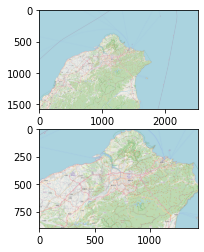

In [13]:
f, axarr = plt.subplots(2)
axarr[0].imshow(map)
axarr[1].imshow(maplrg)

(24.77511693, 25.29717505)

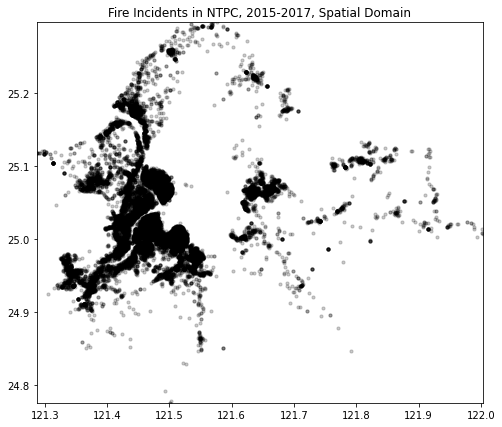

In [14]:
#let's plot the points
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(dften.longitude, dften.latitude, zorder=1, alpha= 0.2, c='k', s=10)
ax.set_title('Fire Incidents in NTPC, 2015-2017, Spatial Domain')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

In [15]:
#split dataframe into 3 years
df15 = df[df['date'].dt.year == 2015]
df16 = df[df['date'].dt.year == 2016]
df17 = df[df['date'].dt.year == 2017]

In [16]:
df15

,date,station,addr1,addr2,longitude,latitude,township
0,2015-01-01 00:13:00,火警-瓦斯漏氣,新北市板橋區重慶路245巷 擎天雙星,新北市板橋區重慶路245巷100號,121.466281,25.000569,板橋區廣德里
1,2015-01-01 00:16:00,火警-倉庫,新北市三重區富福街48號;5樓,新北市三重區富福街45號,121.491579,25.084172,三重區富華里
2,2015-01-01 00:48:00,火警-查看案件,新北市淡水區民權路139號;11樓,新北市淡水區民權路139號,121.460224,25.136422,淡水區民權里
3,2015-01-01 00:56:00,火警-查看案件,新北市新莊區 新月橋近新莊端,新北市新莊區,121.450333,25.031506,新莊區泰豐里
4,2015-01-01 01:04:00,火警-汽車,新北市樹林區八德街71巷,新北市樹林區八德街71巷10號,121.420005,24.982273,樹林區和平里
...,...,...,...,...,...,...,...
9054,2015-12-31 21:41:00,火警-透天厝,新北市中和區大勇街25巷後面,新北市中和區大勇街29巷23弄2號,121.515367,24.994490,中和區秀明里
9055,2015-12-31 21:46:00,火警-集合住宅,新北市樹林區三福街29號;3樓,新北市樹林區三福街29號,121.408602,25.016660,樹林區三福里
9056,2015-12-31 22:37:00,火警-查看案件,新北市林口區麗園一街 派出所後 公園,新北市林口區麗園一街11巷11號,121.378654,25.070749,林口區東勢里
9057,2015-12-31 22:45:00,火警-查看案件,新北市蘆洲區中正路508巷 抽水站後,新北市蘆洲區中正路516巷10號,121.462377,25.097674,蘆洲區保新里


In [17]:
df16

,date,station,addr1,addr2,longitude,latitude,township
9059,2016-01-01 01:10:00,火警-查看案件,新北市泰山區明志路二段298巷18號之3,新北市泰山區明志路二段254巷10號,121.426283,25.047863,泰山區明志里
9060,2016-01-01 01:18:00,火警-查看案件,新北市淡水區 油車口 公園 黑店,新北市淡水區中正東路二段88巷41弄18號,121.458573,25.145268,淡水區八勢里
9061,2016-01-01 01:27:00,火警-查看案件,新北市永和區中正橋 河濱公園 白線015電塔,新北市永和區保福路二段129號,121.509767,25.013844,永和區下溪里
9062,2016-01-01 03:30:00,火警-查看案件,新北市蘆洲區三民路605號3樓,新北市蘆洲區三民路605號,121.460724,25.093751,蘆洲區南港里
9063,2016-01-01 03:47:00,火警-汽車,新北市樹林區 樹仁家商,新北市樹林區大安路216號,121.419350,24.994834,樹林區潭底里
...,...,...,...,...,...,...,...
17156,2016-12-31 19:50:00,火警-集合住宅,新北市板橋區長江路二段207號;14樓,新北市板橋區長江路二段207號,121.467488,25.032542,板橋區溪頭里
17157,2016-12-31 21:51:00,火警-查看案件,新北市板橋區 溪崑國中,新北市板橋區大觀路三段50巷30號,121.431403,24.997751,板橋區崑崙里
17158,2016-12-31 22:30:00,火警-集合住宅,新北市板橋區漢生東路23巷56弄7號;2樓 後棟,新北市板橋區漢生東路23巷56弄7號,121.466328,25.018254,板橋區新民里
17159,2016-12-31 22:52:00,火警-查看案件,新北市林口區東湖 東湖公園,新北市林口區興林一街109巷10號,121.392091,25.072460,林口區西林里


In [18]:
df17

,date,station,addr1,addr2,longitude,latitude,township
17161,2017-01-01 00:13:00,火警-山林田野(平地),新北市鶯歌區 三鶯藝術文化中,新北市鶯歌區環河路175號之8,121.346366,24.936866,鶯歌區二甲里
17162,2017-01-01 00:15:00,火警-集合住宅,新北市三峽區大同路 介壽國小,新北市三峽區永安街7號,121.377841,24.929874,三峽區介壽里
17163,2017-01-01 00:54:00,火警-集合住宅,新北市板橋區館前西路130號;2樓,新北市板橋區館前西路130號,121.456567,25.007928,板橋區流芳里
17164,2017-01-01 01:44:00,火警-集合住宅,新北市汐止區新台五路一段160號,新北市汐止區連興街121號,121.653837,25.062100,汐止區文化里
17165,2017-01-01 01:59:00,火警-警報器作響,新北市汐止區鄉長路一段55巷6號,新北市汐止區鄉長路一段55巷6號,121.665361,25.076035,汐止區建成里
...,...,...,...,...,...,...,...
24085,2017-12-31 17:14:00,火警-集合住宅,新北市中和區圓通路305巷3弄7號 對面5樓,新北市中和區圓通路305巷5弄7號,121.493909,24.990417,中和區錦盛里
24086,2017-12-31 18:40:00,火警-集合住宅,新北市汐止區橫科路322巷24弄6號1樓,新北市汐止區橫科路322巷24弄6號之1,121.621682,25.048063,汐止區東勢里
24087,2017-12-31 20:09:00,火警-查看案件,新北市三重區溪尾街30號,新北市三重區溪尾街30號,121.490806,25.076529,三重區福隆里
24088,2017-12-31 20:44:00,火警-查看案件,新北市永和區民族街67巷27弄5號,新北市永和區民族街67巷27弄5號,121.519391,24.997367,永和區民族里


(24.77511693, 25.29717505)

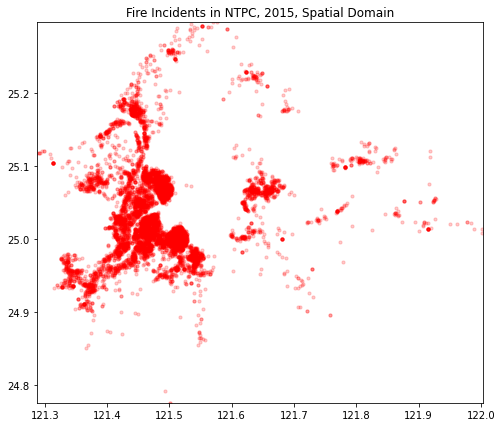

In [19]:
#let's plot the points for 2015
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df15.longitude, df15.latitude, zorder=1, alpha= 0.2, c='r', s=10)
ax.set_title('Fire Incidents in NTPC, 2015, Spatial Domain')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

(24.77511693, 25.29717505)

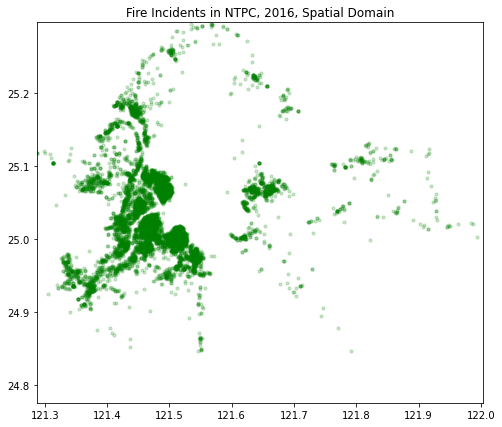

In [20]:
#let's plot the points for 2016
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df16.longitude, df16.latitude, zorder=1, alpha= 0.2, c='g', s=10)
ax.set_title('Fire Incidents in NTPC, 2016, Spatial Domain')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

(24.77511693, 25.29717505)

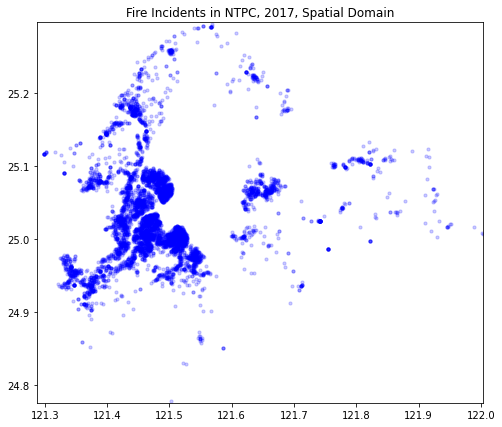

In [21]:
#let's plot the points for 2017
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df17.longitude, df17.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Fire Incidents in NTPC, 2017, Spatial Domain')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

In [22]:
#Extraction of the temporal domain
maxlimit = len(df)
ones = np.ones(maxlimit, dtype="uint32")
dftemp = pd.DataFrame(df.date)
dftemp['freq'] = ones

In [23]:
dftemp

,date,freq
0,2015-01-01 00:13:00,1
1,2015-01-01 00:16:00,1
2,2015-01-01 00:48:00,1
3,2015-01-01 00:56:00,1
4,2015-01-01 01:04:00,1
...,...,...
24085,2017-12-31 17:14:00,1
24086,2017-12-31 18:40:00,1
24087,2017-12-31 20:09:00,1
24088,2017-12-31 20:44:00,1


In [24]:
#when running this block, we will obtain the monthly frequency to be used in the temporal domain (a.k.a. time series).
dftempday = dftemp.groupby(pd.Grouper(key="date", freq="1D")).count()
dftempweek = dftemp.groupby(pd.Grouper(key="date", freq="1W")).count()
dftempmonth = dftemp.groupby(pd.Grouper(key="date", freq="1M")).count()

In [25]:
dftempday

,freq
date,
2015-01-01,34
2015-01-02,25
2015-01-03,24
2015-01-04,34
2015-01-05,28
...,...
2017-12-27,13
2017-12-28,19
2017-12-29,19


In [26]:
dftempweek

,freq
date,
2015-01-04,117
2015-01-11,163
2015-01-18,141
2015-01-25,210
2015-02-01,174
...,...
2017-12-03,125
2017-12-10,109
2017-12-17,105


In [27]:
dftempmonth

,freq
date,
2015-01-31,778
2015-02-28,776
2015-03-31,733
2015-04-30,844
2015-05-31,681
2015-06-30,677
2015-07-31,718
2015-08-31,1030
2015-09-30,792


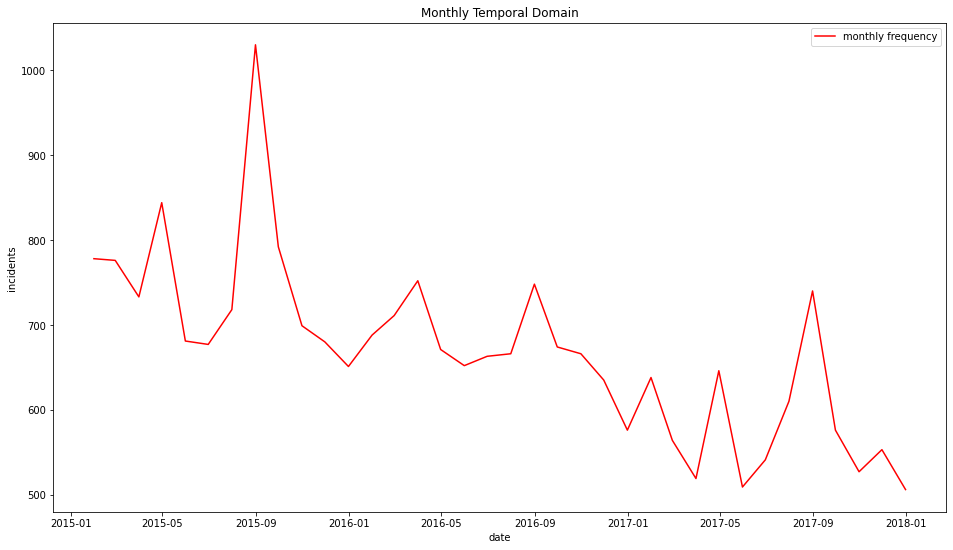

In [28]:
y = dftempmonth['freq']
x = dftempmonth.index
plt.rcParams["figure.figsize"] = (16,9)
plt.plot(x, y, color='r', label='monthly frequency') 
plt.xlabel('date')
plt.ylabel('incidents')
plt.title('Monthly Temporal Domain')
plt.legend() 
plt.show()


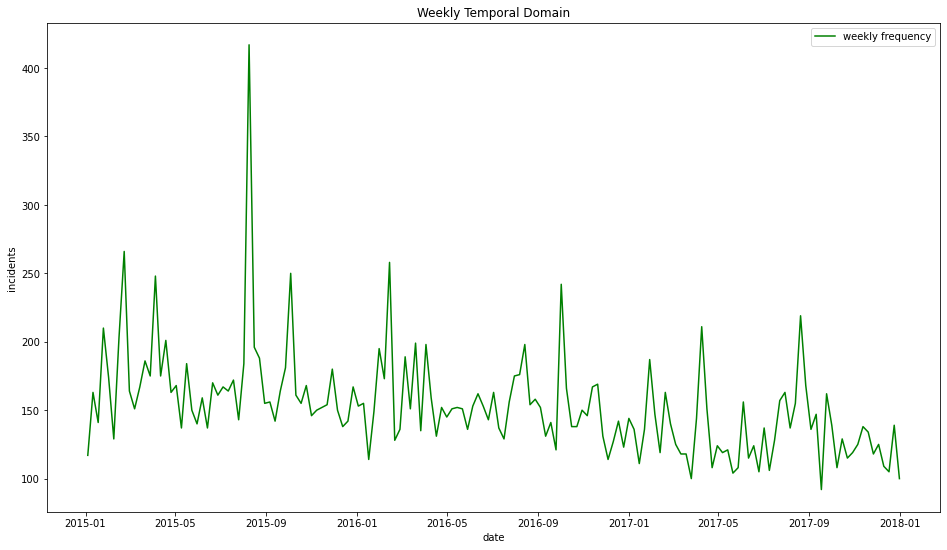

In [29]:
y = dftempweek['freq']
x = dftempweek.index
plt.rcParams["figure.figsize"] = (16,9)
plt.plot(x, y, color='g', label='weekly frequency')
plt.xlabel('date')
plt.ylabel('incidents')
plt.title('Weekly Temporal Domain')
plt.legend() 
plt.show()

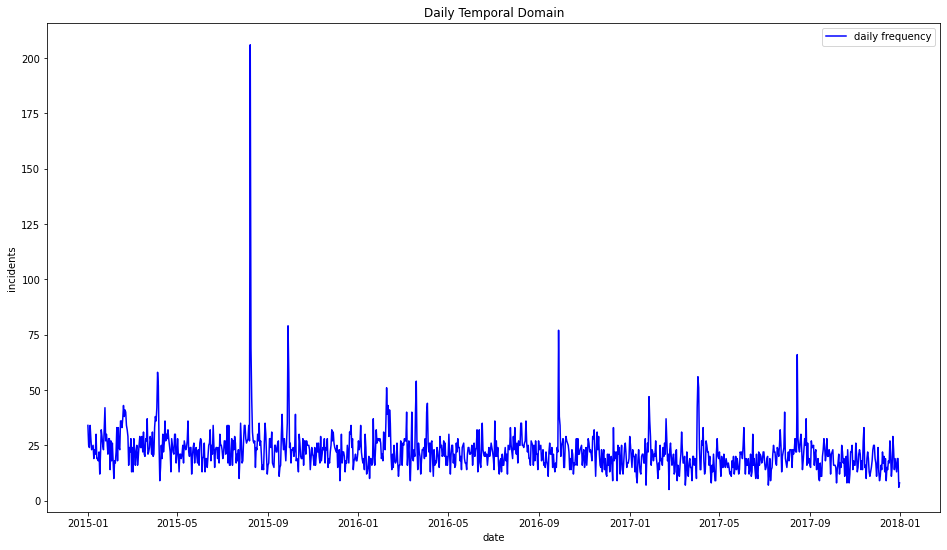

In [30]:
y = dftempday['freq']
x = dftempday.index
plt.rcParams["figure.figsize"] = (16,9)
plt.plot(x, y, color='b', label='daily frequency') 
plt.xlabel('date')
plt.ylabel('incidents')
plt.title('Daily Temporal Domain')
plt.legend() 
plt.show()

#Keras LSTM MODEL

In [31]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Convert dataset to matrix

In [32]:
tseries = dftempday['freq'].to_numpy()
tseries

array([34, 25, 24, ..., 19,  6,  8])

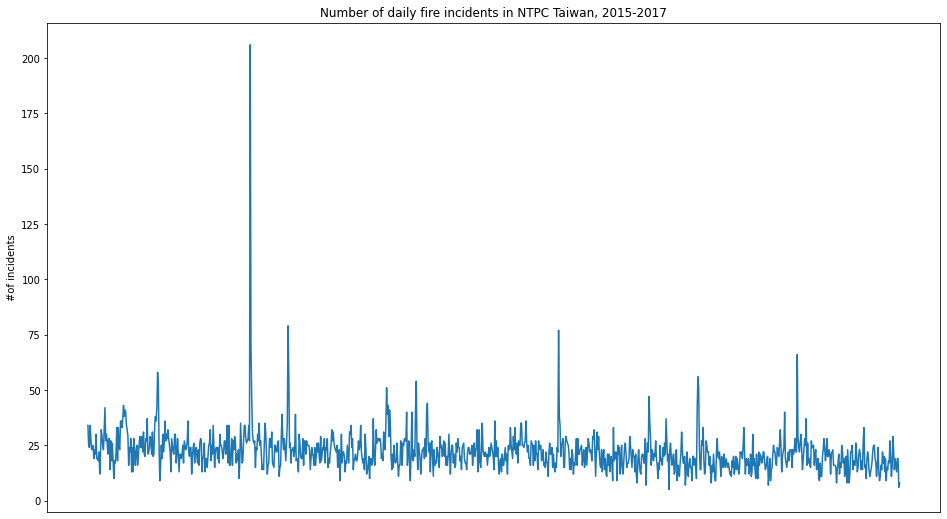

In [33]:
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('#of incidents')
plt.title('Number of daily fire incidents in NTPC Taiwan, 2015-2017')
plt.show()

In [34]:
dftensor=pd.DataFrame(tseries) #forward dataframe
dftensor=np.array(dftensor) #convert to tensor
dftensor #display dataframe

array([[34],
       [25],
       [24],
       ...,
       [19],
       [ 6],
       [ 8]])

In [35]:
dftensor=np.array(dftensor)

Train-test split

In [36]:
train_size = int(len(dftensor) * 0.67)
test_size = len(dftensor) - train_size
train, test = dftensor[0:train_size,:], dftensor[train_size:len(dftensor),:]

Form dataset matrix

In [37]:
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [38]:
dftensor

array([[34],
       [25],
       [24],
       ...,
       [19],
       [ 6],
       [ 8]])

In [39]:
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
train

array([[0.12690355],
       [0.08121827],
       [0.07614213],
       [0.12690355],
       [0.0964467 ],
       [0.07106599],
       [0.07614213],
       [0.08121827],
       [0.05076142],
       [0.07106599],
       [0.06091371],
       [0.10659898],
       [0.05076142],
       [0.05076142],
       [0.04568528],
       [0.06598985],
       [0.01522843],
       [0.06091371],
       [0.11675127],
       [0.10152284],
       [0.08121827],
       [0.07106599],
       [0.11675127],
       [0.16751269],
       [0.09137056],
       [0.10659898],
       [0.08629442],
       [0.06091371],
       [0.0964467 ],
       [0.0964467 ],
       [0.02538071],
       [0.09137056],
       [0.04568528],
       [0.08629442],
       [0.04568528],
       [0.00507614],
       [0.04568528],
       [0.04060914],
       [0.06598985],
       [0.12182741],
       [0.04568528],
       [0.12182741],
       [0.07614213],
       [0.07106599],
       [0.13705584],
       [0.13705584],
       [0.12182741],
       [0.142

In [40]:
test = scaler.fit_transform(test)
test

array([[0.16393443],
       [0.29508197],
       [0.24590164],
       [0.24590164],
       [0.13114754],
       [0.26229508],
       [0.09836066],
       [0.04918033],
       [0.21311475],
       [0.29508197],
       [0.19672131],
       [0.13114754],
       [0.1147541 ],
       [0.24590164],
       [0.26229508],
       [0.26229508],
       [0.19672131],
       [0.19672131],
       [0.37704918],
       [0.03278689],
       [0.24590164],
       [0.3442623 ],
       [0.27868852],
       [0.68852459],
       [0.50819672],
       [0.39344262],
       [0.18032787],
       [0.29508197],
       [0.27868852],
       [0.21311475],
       [0.26229508],
       [0.24590164],
       [0.36065574],
       [0.2295082 ],
       [0.18032787],
       [0.08196721],
       [0.19672131],
       [0.14754098],
       [0.32786885],
       [0.21311475],
       [0.2295082 ],
       [0.18032787],
       [0.31147541],
       [0.24590164],
       [0.3442623 ],
       [0.26229508],
       [0.52459016],
       [0.360

Configure LSTM model

In [41]:
# Lookback period
lookback = 5
X_train, Y_train = create_dataset(train, lookback)
X_test, Y_test = create_dataset(test, lookback)

In [42]:
#X_train

array([[0.12690355, 0.08121827, 0.07614213, 0.12690355, 0.0964467 ],
       [0.08121827, 0.07614213, 0.12690355, 0.0964467 , 0.07106599],
       [0.07614213, 0.12690355, 0.0964467 , 0.07106599, 0.07614213],
       ...,
       [0.08629442, 0.06091371, 0.03045685, 0.04060914, 0.04060914],
       [0.06091371, 0.03045685, 0.04060914, 0.04060914, 0.05076142],
       [0.03045685, 0.04060914, 0.04060914, 0.05076142, 0.10152284]])

In [43]:
#Y_train

array([0.07106599, 0.07614213, 0.08121827, 0.05076142, 0.07106599,
       0.06091371, 0.10659898, 0.05076142, 0.05076142, 0.04568528,
       0.06598985, 0.01522843, 0.06091371, 0.11675127, 0.10152284,
       0.08121827, 0.07106599, 0.11675127, 0.16751269, 0.09137056,
       0.10659898, 0.08629442, 0.06091371, 0.0964467 , 0.0964467 ,
       0.02538071, 0.09137056, 0.04568528, 0.08629442, 0.04568528,
       0.00507614, 0.04568528, 0.04060914, 0.06598985, 0.12182741,
       0.04568528, 0.12182741, 0.07614213, 0.07106599, 0.13705584,
       0.13705584, 0.12182741, 0.14213198, 0.17258883, 0.14720812,
       0.16243655, 0.15736041, 0.12690355, 0.11675127, 0.10152284,
       0.03553299, 0.07614213, 0.06598985, 0.0964467 , 0.02030457,
       0.07614213, 0.02030457, 0.0964467 , 0.07106599, 0.03553299,
       0.06598985, 0.08121827, 0.03553299, 0.05583756, 0.08121827,
       0.10152284, 0.07614213, 0.07614213, 0.10152284, 0.06598985,
       0.11167513, 0.06091371, 0.05583756, 0.0964467 , 0.09137

In [44]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [45]:
X_train.shape[0]

728

In [46]:
X_train.shape[1]

1

In [47]:
X_train.shape

(728, 1, 5)

#LSTM - The model
We have reached the final step - design, fit, and train the LSTM model. Our LSTM layer is 4-noded 1-layered, plus a dense output layer with MSE as loss function, adam as the optimiser, and trained for 100 epochs.

Epoch 1/100
582/582 - 7s - loss: 0.0034 - val_loss: 0.0015 - 7s/epoch - 12ms/step
Epoch 2/100
582/582 - 2s - loss: 0.0030 - val_loss: 0.0016 - 2s/epoch - 3ms/step
Epoch 3/100
582/582 - 2s - loss: 0.0029 - val_loss: 0.0014 - 2s/epoch - 3ms/step
Epoch 4/100
582/582 - 2s - loss: 0.0029 - val_loss: 0.0015 - 2s/epoch - 3ms/step
Epoch 5/100
582/582 - 2s - loss: 0.0029 - val_loss: 0.0015 - 2s/epoch - 3ms/step
Epoch 6/100
582/582 - 2s - loss: 0.0028 - val_loss: 0.0013 - 2s/epoch - 3ms/step
Epoch 7/100
582/582 - 2s - loss: 0.0028 - val_loss: 0.0013 - 2s/epoch - 3ms/step
Epoch 8/100
582/582 - 2s - loss: 0.0028 - val_loss: 0.0013 - 2s/epoch - 3ms/step
Epoch 9/100
582/582 - 2s - loss: 0.0027 - val_loss: 0.0014 - 2s/epoch - 3ms/step
Epoch 10/100
582/582 - 2s - loss: 0.0027 - val_loss: 0.0013 - 2s/epoch - 3ms/step
Epoch 11/100
582/582 - 2s - loss: 0.0027 - val_loss: 0.0012 - 2s/epoch - 3ms/step
Epoch 12/100
582/582 - 2s - loss: 0.0027 - val_loss: 0.0012 - 2s/epoch - 3ms/step
Epoch 13/100
582/582 - 2

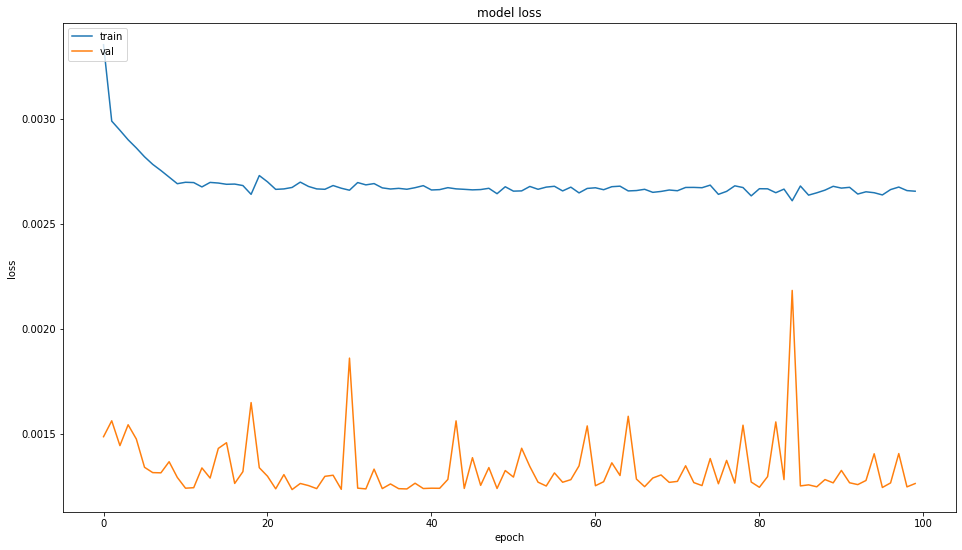

In [48]:
# Generate LSTM network
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1, lookback)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=1, verbose=2)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#LSTM - Prediction
Once we have trained our model, we can start doing predictions. Then, manipulate the post-action data.

In [49]:
# Generate predictions
trainpred = model.predict(X_train)
testpred = model.predict(X_test)

In [50]:
trainpred

array([[0.0845411 ],
       [0.07475206],
       [0.07674396],
       [0.07697418],
       [0.06537418],
       [0.07079121],
       [0.06788528],
       [0.08164297],
       [0.06606172],
       [0.0636527 ],
       [0.0626389 ],
       [0.06670517],
       [0.05039268],
       [0.06309933],
       [0.08280357],
       [0.07959546],
       [0.07714058],
       [0.07517259],
       [0.08959621],
       [0.10730755],
       [0.08542844],
       [0.08989529],
       [0.08471899],
       [0.07096764],
       [0.08212376],
       [0.08236298],
       [0.05751988],
       [0.0777363 ],
       [0.06408705],
       [0.07336608],
       [0.06358527],
       [0.04659827],
       [0.058698  ],
       [0.05616098],
       [0.06288312],
       [0.08385958],
       [0.06357922],
       [0.08852446],
       [0.07811927],
       [0.07200741],
       [0.09712109],
       [0.09816895],
       [0.09478869],
       [0.10519895],
       [0.11725549],
       [0.10966935],
       [0.11550742],
       [0.116

In [51]:
testpred

array([[0.11702728],
       [0.15791306],
       [0.10441898],
       [0.06516228],
       [0.13346007],
       [0.15616485],
       [0.12972865],
       [0.11124532],
       [0.10045061],
       [0.14731807],
       [0.15317513],
       [0.15750992],
       [0.14317161],
       [0.13754901],
       [0.20551375],
       [0.0851092 ],
       [0.14030117],
       [0.20017934],
       [0.16177124],
       [0.30129296],
       [0.27553684],
       [0.22623855],
       [0.12928882],
       [0.15966459],
       [0.18329154],
       [0.14495248],
       [0.16738015],
       [0.16316184],
       [0.20016688],
       [0.16302955],
       [0.1296182 ],
       [0.08911275],
       [0.1271671 ],
       [0.11430056],
       [0.16910799],
       [0.14673088],
       [0.14652042],
       [0.13789564],
       [0.17821074],
       [0.16254905],
       [0.19276674],
       [0.17756432],
       [0.26051325],
       [0.22590344],
       [0.14502226],
       [0.16781281],
       [0.05395592],
       [0.158

In [52]:
# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
testpred = scaler.inverse_transform(testpred)
Y_test = scaler.inverse_transform([Y_test])
predictions = testpred

In [53]:
Y_train.shape

(1, 728)

In [54]:
Y_test.shape

(1, 356)

In [55]:
X_train.shape

(728, 1, 5)

In [56]:
X_test.shape

(356, 1, 5)

In [57]:
Y_train

array([[ 9.33502538,  9.64467005,  9.95431472,  8.0964467 ,  9.33502538,
         8.71573604, 11.50253807,  8.0964467 ,  8.0964467 ,  7.78680203,
         9.02538071,  5.92893401,  8.71573604, 12.12182741, 11.1928934 ,
         9.95431472,  9.33502538, 12.12182741, 15.21827411, 10.57360406,
        11.50253807, 10.26395939,  8.71573604, 10.88324873, 10.88324873,
         6.54822335, 10.57360406,  7.78680203, 10.26395939,  7.78680203,
         5.30964467,  7.78680203,  7.47715736,  9.02538071, 12.43147208,
         7.78680203, 12.43147208,  9.64467005,  9.33502538, 13.36040609,
        13.36040609, 12.43147208, 13.67005076, 15.52791878, 13.97969543,
        14.90862944, 14.59898477, 12.74111675, 12.12182741, 11.1928934 ,
         7.16751269,  9.64467005,  9.02538071, 10.88324873,  6.23857868,
         9.64467005,  6.23857868, 10.88324873,  9.33502538,  7.16751269,
         9.02538071,  9.95431472,  7.16751269,  8.40609137,  9.95431472,
        11.1928934 ,  9.64467005,  9.64467005, 11.1

In [58]:
Y_test

array([[21., 11.,  8., 18., 23., 17., 13., 12., 20., 21., 21., 17., 17.,
        28.,  7., 20., 26., 22., 47., 36., 29., 16., 23., 22., 18., 21.,
        20., 27., 19., 16., 10., 17., 14., 25., 18., 19., 16., 24., 20.,
        26., 21., 37., 27., 18., 21.,  5., 23., 26., 20., 16., 18., 21.,
        12., 13., 22., 23.,  9., 16., 13., 11., 17., 21., 31., 23., 17.,
        17., 20.,  7., 12., 22., 14., 11., 17., 19., 15., 15.,  9., 20.,
        20., 16., 19., 17., 10., 42., 56., 51., 24., 14., 14., 27., 25.,
        33., 18., 12., 14., 27., 25., 22., 22., 16., 20., 13.,  8., 16.,
        13., 21., 15.,  9.,  9., 22., 28., 20., 19., 22., 17., 11., 20.,
        15., 15., 21., 17., 15., 19., 17., 15., 17., 15., 12., 13., 11.,
        18., 15., 20., 12., 15., 20., 14., 19., 16., 12., 14., 22., 21.,
        22., 19., 25., 33., 21., 12., 19., 16., 16., 19., 12., 14., 21.,
        11., 13., 30., 16., 19., 14., 10., 21., 12., 10., 22., 16., 21.,
        20., 17., 18., 22., 22., 17., 14., 15., 19.

#Screen Prediction Accuracy on Test Data
Once we have reviewed the input train-test data for the prediction - we can carry it out now.

In [59]:
# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(Y_test[0], testpred[:,0]))
print('Test Score: %f RMSE' % (valScore))

Train Score: 2.955671 RMSE
Test Score: 8.298634 RMSE


In [60]:
# Train predictions
trainpredPlot = np.empty_like(dftempday)
trainpredPlot[:, :] = np.nan
trainpredPlot[lookback:len(trainpred)+lookback, :] = trainpred

In [61]:
# Test predictions
testpredPlot = np.empty_like(dftempday)
testpredPlot[:, :] = np.nan
testpredPlot[len(trainpred)+(lookback*2)+1:len(dftempday)-1, :] = testpred

In [62]:
Y_test=Y_test.reshape(-1)
Y_test.shape
Y_test=pd.Series(Y_test)

In [63]:
Y_test

0      21.0
1      11.0
2       8.0
3      18.0
4      23.0
       ... 
351    16.0
352    13.0
353    19.0
354    19.0
355     6.0
Length: 356, dtype: float64

In [64]:
predictions=predictions.reshape(-1)
predictions.shape
predictions=pd.Series(predictions)

In [65]:
predictions

0      12.138664
1      14.632697
2      11.369558
3       8.974899
4      13.141065
         ...    
351    14.233829
352    13.271368
353    11.453034
354    13.836061
355    13.957558
Length: 356, dtype: float32

#LSTM - Finalisation
As we have just carried out the prediction, let's evaluate the performance in terms of several metrics (mda, rmse) and visualise the prediction graph

In [66]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [67]:
mda(Y_test, predictions)

0.9943820224719101

Test metrics

In [68]:
# https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/

mse = mean_squared_error(Y_test, predictions)
mae = metrics.mean_absolute_error(Y_test, predictions)
mape = metrics.mean_absolute_percentage_error(Y_test, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)
print('MSE: %f' % mse)
print('MAE: %f' % mae)
print('MAPE: %f' % mape)

RMSE: 8.298634
MSE: 68.867322
MAE: 6.198668
MAPE: 0.306663


train metrics

In [69]:
trmse = mean_squared_error(Y_train[0], trainpred[:,0])
trmae = metrics.mean_absolute_error(Y_train[0], trainpred[:,0])
trmape = metrics.mean_absolute_percentage_error(Y_train[0], trainpred[:,0])
trrmse = sqrt(trmse)
print('RMSE: %f' % trrmse)
print('MSE: %f' % trmse)
print('MAE: %f' % trmae)
print('MAPE: %f' % trmape)

RMSE: 2.955671
MSE: 8.735990
MAE: 1.599876
MAPE: 0.170367


In [70]:
np.mean(Y_test)

18.97752808988764

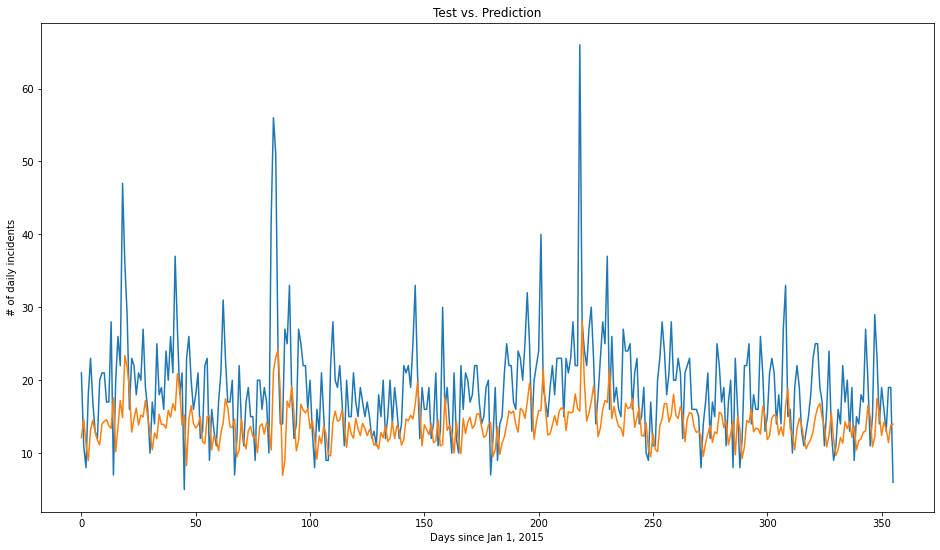

In [71]:
plt.plot(Y_test)
plt.plot(predictions)
plt.xlabel('Days since Jan 1, 2015')
plt.ylabel('# of daily incidents')
plt.title("Test vs. Prediction")
plt.show()